In [3]:
#https://auth0.com/blog/image-processing-in-python-with-pillow/
#website wo scaling funktion beschrieben war
import os
import matplotlib.pyplot as plt
import csv
from PIL import Image

def readTrafficSigns():
    images = []
    labels = []
    images_test = []
    dir_path = os.path.dirname(os.path.realpath("ErstesModell.ipynb"))
    print(dir_path)
    # loop over all 42 classes
    for c in range(0,43):
        if c < 10:
            directory_number ='0000'+ format(c)
        else:
            directory_number ='000'+ format(c)
        print("entering directory "+ directory_number)
        #finds the local directory
        prefix = dir_path + '\\Images\\' + directory_number + '\\' 
        # subdirectory for class
        gtFile = open(prefix + 'GT-'+ directory_number + '.csv') 
        # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') 
        # csv parser for annotations file
        next(gtReader) 
        # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            image = Image.open(prefix + row[0])
            new_image = image.resize((49, 49))
            new_image.save('scaled.ppm')
            images.append(plt.imread('scaled.ppm')) 
            # the 1th column is the filename
            labels.append(row[7]) 
            # the 8th column is the label
        gtFile.close()
        
    prefix_test = dir_path + '\\Images_Test\\'
    gtTestFile =open(prefix_test + 'GT-final_test.csv' )
    gtTestReader = csv.reader(gtTestFile, delimiter=';')
    next(gtTestReader)
    print("Train Images Loaded")
    for row in gtTestReader:
        image = Image.open(prefix_test + row[0])
        new_image = image.resize((49, 49))
        new_image.save('scaled.ppm')
        images_test.append(plt.imread('scaled.ppm'))             
    gtTestFile.close()
    return images, labels, images_test

In [4]:
trainImages, trainLabels, testImages = readTrafficSigns()
print(len(trainLabels), len(trainImages))
print(len(testImages))

C:\Users\Malte\Schilder
entering directory 00000
entering directory 00001
entering directory 00002
entering directory 00003
entering directory 00004
entering directory 00005
entering directory 00006
entering directory 00007
entering directory 00008
entering directory 00009
entering directory 00010
entering directory 00011
entering directory 00012
entering directory 00013
entering directory 00014
entering directory 00015
entering directory 00016
entering directory 00017
entering directory 00018
entering directory 00019
entering directory 00020
entering directory 00021
entering directory 00022
entering directory 00023
entering directory 00024
entering directory 00025
entering directory 00026
entering directory 00027
entering directory 00028
entering directory 00029
entering directory 00030
entering directory 00031
entering directory 00032
entering directory 00033
entering directory 00034
entering directory 00035
entering directory 00036
entering directory 00037
entering directory 00038
e

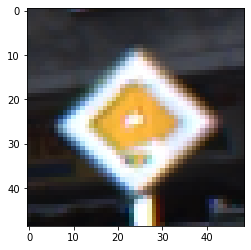

In [5]:
plt.imshow(trainImages[20000])
plt.show()

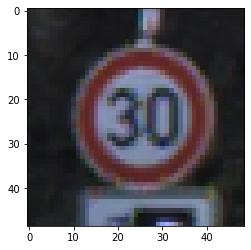

In [7]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainImages, trainLabels, test_size=0.10, random_state=42)
plt.imshow(X_train[0])
plt.show()

In [6]:
from functools import partial
from tensorflow import keras

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])


ImportError: Traceback (most recent call last):
  File "c:\users\malte\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow_internal', [dirname(__file__)])
  File "c:\users\malte\appdata\local\programs\python\python36-32\lib\imp.py", line 297, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow_internal'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\malte\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\malte\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\malte\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    import _pywrap_tensorflow_internal
ModuleNotFoundError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.